####  2세대 도감 만들기 
<hr>
1. 251 마리의 이미지를 받아서 <br>
2. 70 * 70 사이즈로 리사이즈 <br>
3. 컬러로 돌릴 예정   약 4900*3 = 150000 컬럼 예상<br>
4. 이미지 251개를 10배가량 복제할 예정<br>
5. 이미지 처리후, csv에 저장. <br>
<hr>
6. csv로부터 파일을 읽어서 도감 번호를 타겟으로 설정 하여 트레인/테스트<br>
7. 모델 만들기.<br>
8. 여유있으면 웹연결하여 예측모델 만들기.<br>




In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import pandas as pd # 데이터 분석 및 전처리

from _utils.ClassfierModule import ClassfierModule as cm
from _utils import tools as ts

In [60]:
data_dir = './_data/'
img_dir  = './_image/'


In [61]:
initDF = pd.DataFrame(pd.read_csv(data_dir+'processed_seal.csv', index_col= 0, encoding='utf-8'))

In [62]:
initDF.head()

,0,1,2,3,4,5,6,7,8,9,...,14691,14692,14693,14694,14695,14696,14697,14698,14699,14700
./_image/processed/00010300.png,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./_image/processed/00010301.png,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./_image/processed/00010600.png,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./_image/processed/00010601.png,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./_image/processed/00010900.png,1,0.956863,0.960784,0.960784,0.988235,0.988235,0.988235,0.988235,0.992157,0.988235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# initDF.loc[initDF.index[1:], '0'] = initDF.loc[initDF.index[1:], '0']*255
# initDF.loc[initDF.index[1:], '0'] = initDF.loc[initDF.index[1:], '0'].astype(int)

In [64]:
initDF.loc[initDF.index[1:], '0'].head()

./_image/processed/00010301.png    1
./_image/processed/00010600.png    1
./_image/processed/00010601.png    1
./_image/processed/00010900.png    1
./_image/processed/00010901.png    1
Name: 0, dtype: int64

In [65]:
initDF['0'] = initDF['0'].astype(int)

In [66]:
initDF.shape

(2304, 14701)

In [67]:
X_train, X_test, y_train, y_test = ts.train_test_cut(initDF.loc[:,'1':], initDF['0'], stratify=initDF['0'])

X_train => 2D (1728, 14700) / X_test => 2D, (576, 14700)
y_train => 1D (1728,), / y_test => 1D, (576,)


In [68]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [69]:
test = cm(X_train, y_train, X_test, y_test)

In [70]:
dtModel, dtDF = test.decision_tree_classification(max_depth=20, min_samples_split=4, min_samples_leaf = 2)
dtDF

              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       0.86      1.00      0.92         6
           3       0.75      1.00      0.86         6
           4       1.00      1.00      1.00         6
           5       0.42      0.83      0.56         6
           6       0.83      0.83      0.83         6
           7       0.33      0.33      0.33         6
           8       0.25      0.17      0.20         6
           9       0.50      0.67      0.57         6
          10       0.17      0.17      0.17         6
          11       0.80      0.67      0.73         6
          12       0.40      0.67      0.50         6
          13       0.00      0.00      0.00         6
          14       1.00      1.00      1.00         6
          15       0.12      0.17      0.14         6
          16       1.00      1.00      1.00         6
          17       0.43      0.50      0.46         6
          18       0.33    

,train_score,test_score,diff,train_loss,test_loss
dt,0.925926,0.618056,0.30787,0.074074,0.381944


In [71]:
rfModel, rfDF = test.rf_classifier(max_depth=6, min_samples_split=2, min_samples_leaf = 1)
rfDF

              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       0.60      1.00      0.75         6
           8       1.00      0.50      0.67         6
           9       1.00      0.33      0.50         6
          10       1.00      1.00      1.00         6
          11       0.50      1.00      0.67         6
          12       0.00      0.00      0.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         6
          15       1.00      0.50      0.67         6
          16       1.00      1.00      1.00         6
          17       0.00      0.00      0.00         6
          18       0.00    

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,train_score,test_score,diff,train_loss,test_loss
rf,0.967014,0.822917,0.144097,0.032986,0.177083


In [39]:
import joblib
joblib.dump(rfModel, "./_model/rf_model_b.joblib")

['./_model/rf_model_b.joblib']

In [40]:
X_train.iloc[0,:]
y_train[0]

C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2802998029.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train[0]


240

In [41]:
for i in range(20):
    X_train_pred=rfModel.predict(X_train.iloc[i,:].values.reshape(1,-1))
    print(X_train_pred, y_train[i])

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[240] 240
[214] 214


C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid

[235] 235
[222] 222


C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid

[186] 186
[180] 180


C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid

[226] 226
[215] 215


C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid

[166] 166
[174] 174


C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid

[158] 158
[245] 245


C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid

[241] 241
[177] 177


C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid

[218] 218
[194] 194


C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid

[192] 192
[197] 197


C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])
c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid

[175] 175
[189] 189


C:\Users\matdo\AppData\Local\Temp\ipykernel_14952\2340299379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(X_train_pred, y_train[i])


In [42]:
X_test_pred_proba = rfModel.predict_proba([X_test.iloc[0,:]])
X_test_pred_proba

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.00951772, 0.01798469, 0.00687941, 0.01548261, 0.00587611,
        0.00600791, 0.0112335 , 0.0105292 , 0.00950014, 0.01510635,
        0.00709101, 0.0081786 , 0.00810092, 0.01633073, 0.01168999,
        0.01461952, 0.00720091, 0.00669938, 0.00925268, 0.00732238,
        0.01305188, 0.00156988, 0.00393892, 0.00025227, 0.00504509,
        0.0910865 , 0.00605682, 0.00827177, 0.00661973, 0.00925075,
        0.01749002, 0.00130057, 0.00457231, 0.01503872, 0.03278797,
        0.00567459, 0.06049716, 0.00716823, 0.00376646, 0.01623709,
        0.02490933, 0.00750356, 0.00968791, 0.00629465, 0.00777646,
        0.00393023, 0.00019893, 0.00951638, 0.00785486, 0.00187975,
        0.00679686, 0.01654174, 0.01162205, 0.00942764, 0.00613726,
        0.00585323, 0.00122318, 0.00556654, 0.0090217 , 0.01089582,
        0.00601448, 0.00682247, 0.00805726, 0.00145651, 0.01118006,
        0.01363593, 0.0064486 , 0.01032874, 0.00770765, 0.01282492,
        0.00444779, 0.00884825, 0.00785938, 0.00

In [43]:
from rembg import remove


def remove_background(image):
    """
    rembg를 이용하여 이미지의 배경을 제거하는 함수

    Parameters:
        image (numpy.ndarray): 원본 이미지 (BGR 형식)

    Returns:
        numpy.ndarray: 배경이 제거된 이미지 (RGBA 형식)
    """
    # OpenCV의 이미지를 PIL 이미지로 변환
    import PIL.Image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV 이미지는 BGR이므로 변환 필요
    pil_image = PIL.Image.fromarray(image_rgb)

    # 배경 제거 수행
    output_pil = remove(pil_image)

    # 다시 OpenCV 형식으로 변환 (RGBA 형식 유지)
    output = np.array(output_pil)

    output_bgr = cv2.cvtColor(output, cv2.COLOR_RGBA2BGR)
    return output_bgr

In [44]:
img_dir+'test/test (4).jpg'

'./_image/test/test (4).jpg'

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([186])

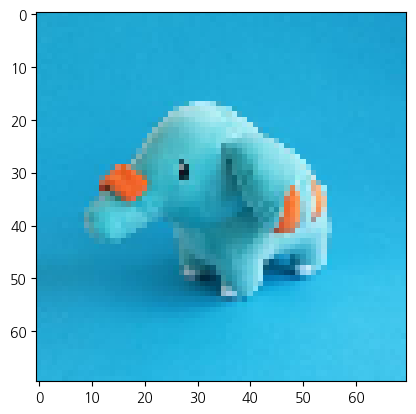

In [45]:
real1 = cv2.imread(img_dir+'test/test (21).jpg', cv2.IMREAD_COLOR)
real1 = cv2.resize(real1,(70,70))
real1 = cv2.cvtColor(real1, cv2.COLOR_BGR2RGB)
plt.imshow(real1)
real1_arr = (real1/255).reshape(1,-1)
rfModel.predict(real1_arr)

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([175])

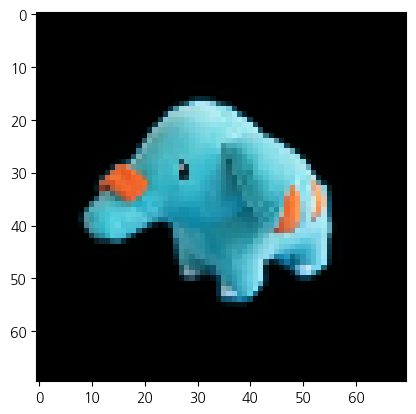

In [46]:

real12= remove_background(real1)
# real12 = cv2.flip(real12,1)
plt.imshow(real12)
rfModel.predict(real12.reshape(1,-1))

c:\Users\matdo\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([175])

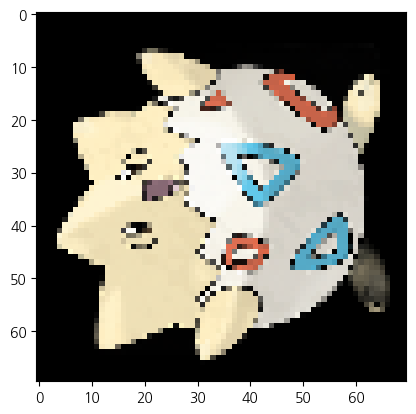

In [47]:
test1 = cv2.imread(img_dir+'processed/01750900.png', cv2.IMREAD_COLOR)
test1 = cv2.cvtColor(test1, cv2.COLOR_BGR2RGB)
plt.imshow(test1)
test1_arr = test1.flatten()/255
rfModel.predict([test1_arr])